---
execute: 
    echo: false
    enabled: true
---

In [1]:
import json 
import glob
import torch
import pandas as pd

from shapesynthesis.plotting import plot_recon_2d, plot_recon_3d

In [2]:
def model_to_cate(model):
    model_to_cate_dict = {
        "encoder_airplane_sparse": "Airplane",
        "encoder_chair_sparse": "Chair",
        "encoder_car_sparse":"Car",
        "rendered_airplane": "Airplane",
        "rendered_chair": "Chair",
        "rendered_car":"Car",
        "encoder_mnist": "MNIST"
    }
    return model_to_cate_dict[model]


def model_to_modelname(model):
    model_to_modelname_dict = {
        "encoder_airplane_sparse": "Encoder",
        "encoder_chair_sparse": "Encoder",
        "encoder_car_sparse":"Encoder",
        "rendered_airplane": "Rendered",
        "rendered_chair": "Rendered",
        "rendered_car":"Rendered",
        "encoder_mnist": "Encoder"
    }
    return model_to_modelname_dict[model]

# Reconstruction of MNIST and ShapeNetCore

The encoder is the `encoder_sparse` and the rendered model is the point cloud
optimization rendering (a non-parametric method). The latter clearly outperforms 
all models.  

In [3]:

fn = glob.glob("./results/**/**.json")
results = []
for filename in fn:
    with open(filename,"r") as f:
        results.extend(json.load(f))

df = pd.DataFrame(results)
df = df.drop(["fscore","normalized"],axis=1)
df["MMD-CD"] *= 1e4 
df["MMD-EMD"] *= 1e3 

df["dataset"] = df["model"].apply(model_to_cate)
df["model"] = df["model"].apply(model_to_modelname)
df = df.groupby(by=["model","dataset"]).agg(["mean"])

df.unstack().swaplevel(1,2,axis=1).swaplevel(0,1,axis=1).sort_index(axis=1)

dataset   Airplane                 Car                Chair             \
            MMD-CD   MMD-EMD    MMD-CD    MMD-EMD    MMD-CD    MMD-EMD   
              mean      mean      mean       mean      mean       mean   
model                                                                    
Encoder   1.121926  4.798106  6.146839  10.299724  9.820879  25.073627   
Rendered  0.316157  0.116938  0.889835   0.273740  0.683799   0.221733   

dataset       MNIST             
             MMD-CD    MMD-EMD  
               mean       mean  
model                           
Encoder   48.546912  57.837475  
Rendered        NaN        NaN

# Model outputs

In [4]:
def visualize_2d_model(model):
    recon_pcs = torch.load(f'./results/{model}/reconstructions.pt').cpu().detach().squeeze().numpy()
    reference_pcs = torch.load(f'./results/{model}/references.pt').cpu().detach().squeeze().numpy()
    plot_recon_2d(recon_pcs=recon_pcs,ref_pcs=reference_pcs)

def visualize_3d_model(model,scale=1.0):
    recon_pcs = scale*torch.load(f'./results/{model}/reconstructions.pt').cpu().detach().squeeze().numpy()
    reference_pcs = scale*torch.load(f'./results/{model}/references.pt').cpu().detach().squeeze().numpy()
    plot_recon_3d(recon_pcs=recon_pcs,ref_pcs=reference_pcs)

## MNIST

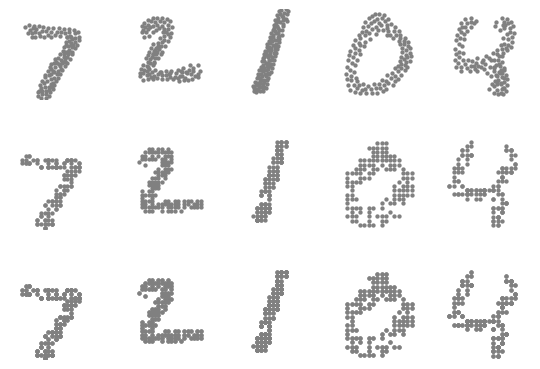

In [5]:
visualize_2d_model("encoder_mnist")

## CNN Encoder Chair 

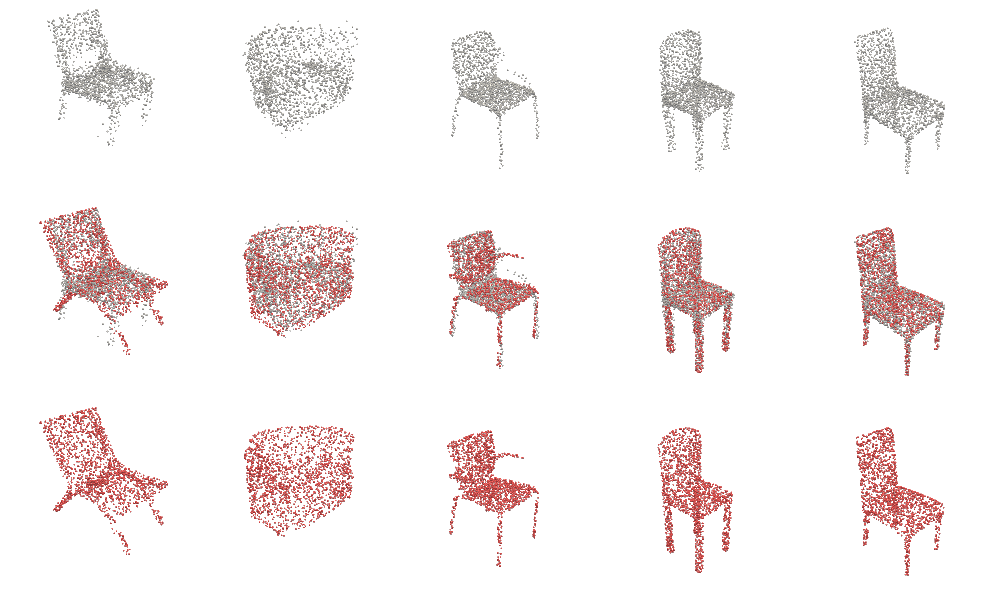

In [6]:
visualize_3d_model("encoder_chair_sparse",scale=6)


## CNN Encoder Char

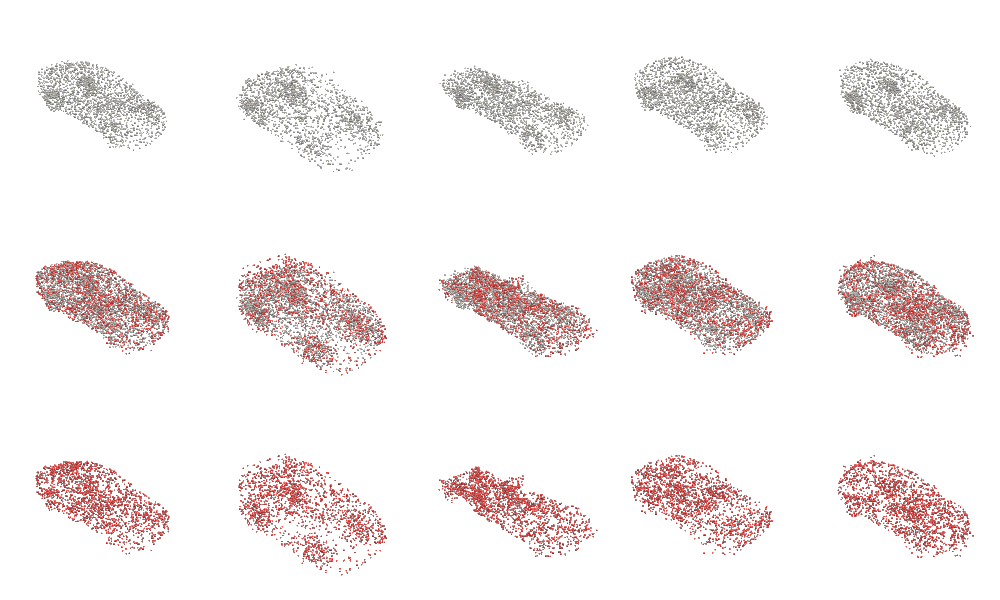

In [7]:
visualize_3d_model("encoder_car_sparse",scale=7)


## CNN Encoder Airplane

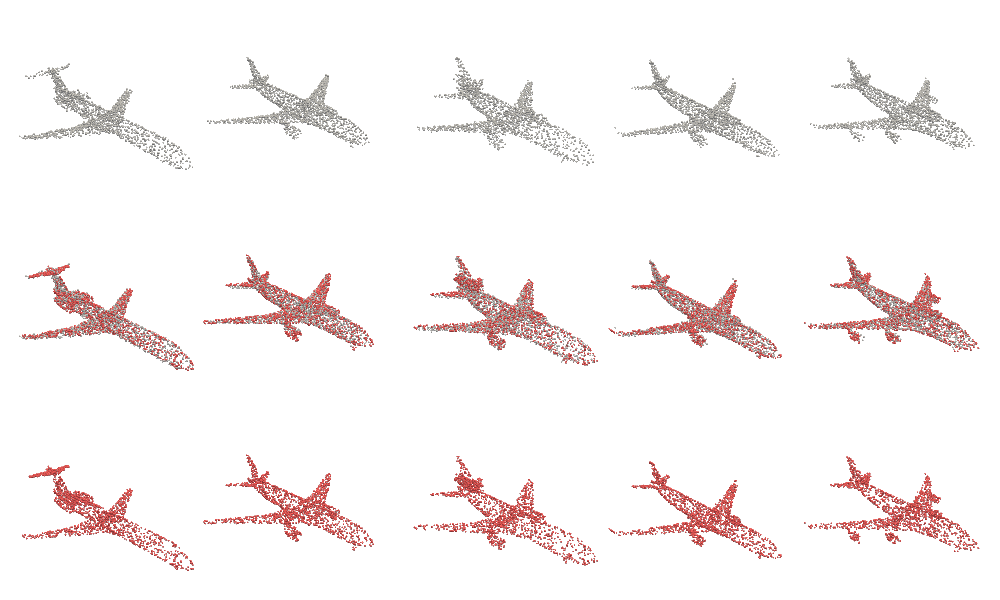

In [8]:
visualize_3d_model("encoder_airplane_sparse",scale=10)
